# 02.05 Random Walk

A random walk is a mathematical concept where random steps are performed repeatedly.
Each step consist of adding a random number the the current cumulative sum of all previous steps.
Variants of the random walk allow the random numbers to be units (-1 or 1), floating points,
limited within a range, and/or taken from a distribution.

Several stochastic processes can be modeled through a random walk,
notably processes seen in nature.
We will simulate a handful of random walks and get a hang of vectorized computing
and simple plotting in the process.

The `pyplot` is an interface to many plotting facilities in `matplotlib`.
For now do not worry about the `%matplotlib inline` line.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

![Brownie](np-brownie.svg)

<div style="text-align:right;"><sup>np-brownie.svg</sup></div>

## Vectorized Summing

We generate a simple random walk by generating random numbers and summing them.

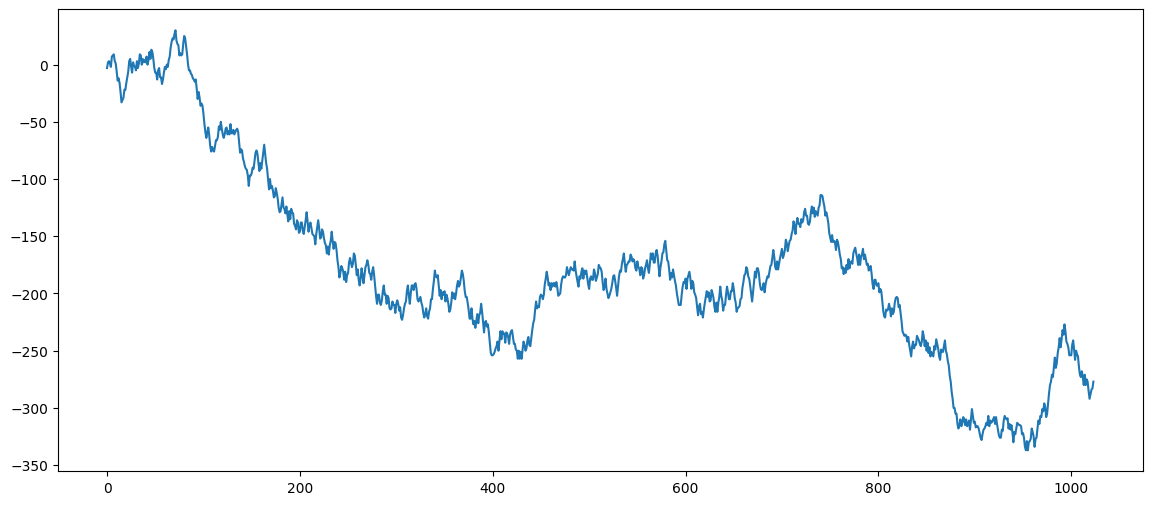

In [2]:
rng = np.random.RandomState(42)
steps = 1024
numbers = rng.randint(-9, 10, steps)
sums = numbers.cumsum()
plt.figure(figsize=(14, 6))
plt.plot(sums);

What we did is a loop without actually writing a loop: an aggregation.
Yet, we can do better.
If we generate a matrix of random numbers we can sum across columns,
and build several random walks at once.

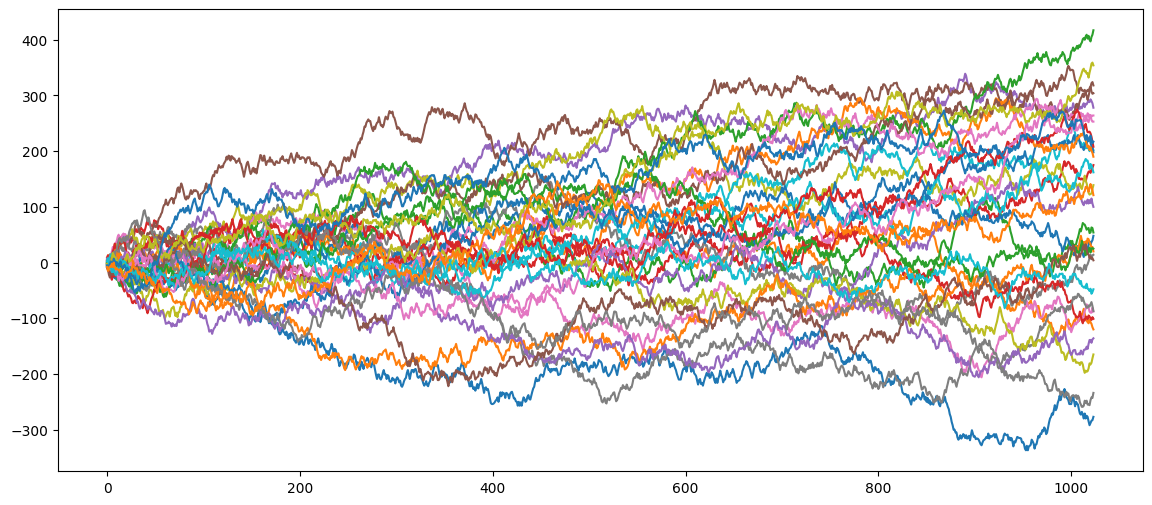

In [3]:
rng = np.random.RandomState(42)
steps = 1024
runs = 32
numbers = rng.randint(-9, 10, (runs, steps))
sums = numbers.cumsum(axis=1)
plt.figure(figsize=(14, 6))
plt.plot(sums.T);

### Step by Step

That was a lot to take in, slow down.
Let's reduce the number of steps and walks and do an in-deep look at every piece of that code.

In [4]:
rng = np.random.RandomState(42)
steps = 6
runs = 3
numbers = rng.randint(-9, 10, (runs, steps))
numbers

array([[-3,  5,  1, -2, -3,  9],
       [ 1,  1, -6, -2, -7, -8],
       [ 2, -4, -8, -9,  2,  2]])

We have three sets of random numbers, three rows in a matrix.

In [5]:
sums = numbers.cumsum(axis=1)
sums

array([[ -3,   2,   3,   1,  -2,   7],
       [  1,   2,  -4,  -6, -13, -21],
       [  2,  -2, -10, -19, -17, -15]])

`axis=1` means: perform the aggregation *across* columns.
Therefore we performed a cumulative sum inside each row,
we now have three random walks inside each row.

In [6]:
sums.T

array([[ -3,   1,   2],
       [  2,   2,  -2],
       [  3,  -4, -10],
       [  1,  -6, -19],
       [ -2, -13, -17],
       [  7, -21, -15]])

The plotting engine understands *columns* as separate functions,
therefore we need to transpose (`.T`) the matrix for plotting.
We only need to call `plt.figure` to parametrize the image, in this case its size, in inches.
The default size of the image is 5 by 5 inches, which is quite small for most uses.

Note: The notebook main area uses a resolution of 72 DPI (dots per inch).
Which means that its width resolution of 14-15 inches is just around 1024 pixels.
Any image bigger than that (in pixels or inches) will be scaled down,
and its aspect ratio adapted accordingly.

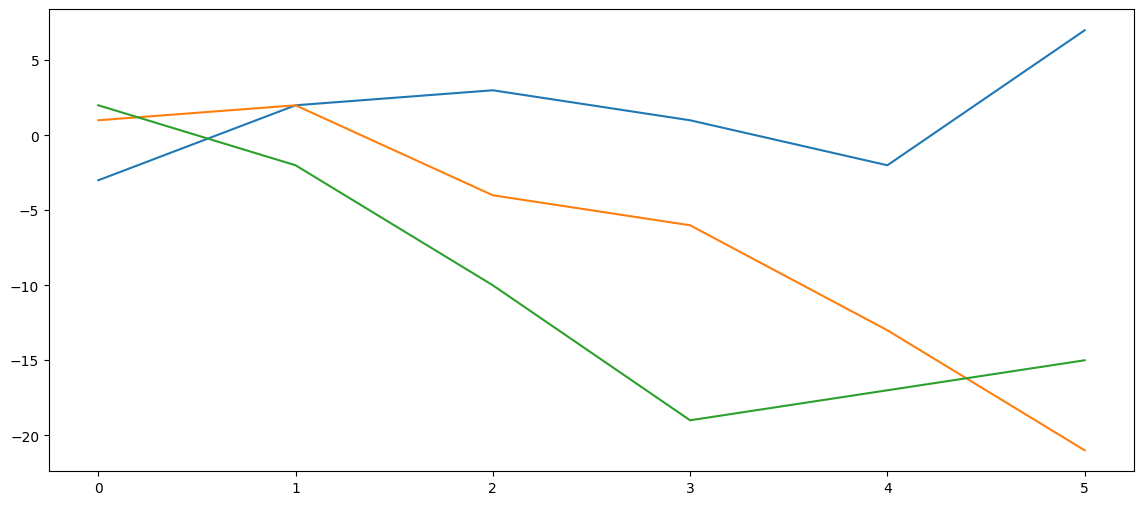

In [7]:
plt.figure(figsize=(14, 6))
plt.plot(sums.T);

Let's go back to the full example.

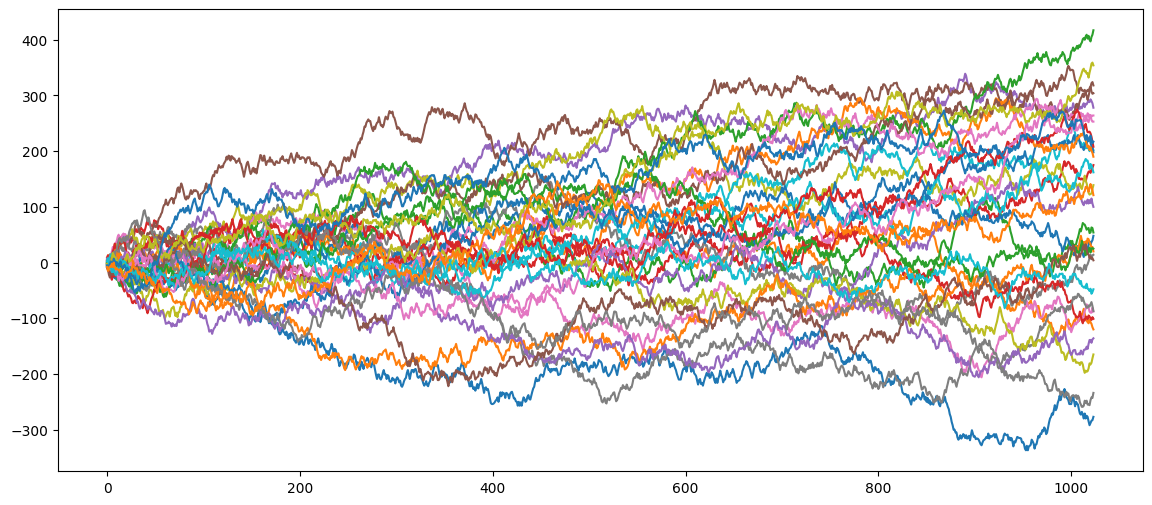

In [8]:
rng = np.random.RandomState(42)
steps = 1024
runs = 32
numbers = rng.randint(-9, 10, (runs, steps))
sums = numbers.cumsum(axis=1)
plt.figure(figsize=(14, 6))
plt.plot(sums.T);

## Data Features

We can extract statistics (also called features) about the walks.
For example, the walk that reached the higher number at the end.

In [9]:
sums[:, -1].argmax()

np.int64(12)

Or the smallest value.

In [10]:
sums[:, -1].argmin()

np.int64(0)

How many walks turned on the positive side?

In [11]:
np.sum(sums[:, -1] > 0)

np.int64(23)

How many walks stray above 100 or below -100?

In [12]:
np.sum(np.abs(sums[:, -1]) > 100)

np.int64(22)

Which was the first walk to stray 100 (or -100) from the origin
(and did stay there)?

This is slightly more complicated because we want to consider only the walks that stray that much.
Also note that `argmax` (and `argmin`) will take the *first* maximum (or minimum) value in an array,
i.e. if there is more than a single maximum value.
In the case of a boolean array (as below) `argmax` will give the index of the first `True` value.

In [13]:
above = np.abs(sums[:, -1]) > 100
(np.abs(sums[above, :]) > 100).argmax(axis=1).argmin()

np.int64(4)

Let's have a look at that specific random walk.

In [14]:
sums[above, :][4, :128]

array([ -1,   6,   1,   3,  -6,  -6,  -5,   1,   5,   3,  10,  18,  20,
        27,  31,  37,  41,  40,  34,  35,  31,  36,  31,  32,  40,  43,
        44,  48,  56,  65,  70,  69,  67,  58,  52,  56,  48,  54,  47,
        45,  41,  47,  53,  50,  53,  56,  51,  59,  64,  72,  64,  64,
        67,  75,  80,  82,  87,  90,  98, 103, 104, 113, 106, 103, 107,
       111, 114, 116, 115, 106, 115, 116, 125, 133, 135, 126, 135, 142,
       137, 130, 122, 115, 113, 119, 115, 118, 124, 130, 123, 126, 130,
       128, 130, 128, 127, 118, 114, 123, 124, 125, 128, 129, 137, 142,
       133, 130, 133, 135, 143, 152, 157, 155, 164, 164, 161, 169, 175,
       171, 170, 173, 171, 177, 180, 183, 190, 185, 192, 191])

Pretty sensible, this random walk reaches 100 very quickly.

Another way to reach the same array is to calculate which row index inside `above`
corresponds to the row index inside `sums`.

In [15]:
idx = 4
sums[(above.cumsum() == (idx + 1)).argmax(), :128]

array([ -1,   6,   1,   3,  -6,  -6,  -5,   1,   5,   3,  10,  18,  20,
        27,  31,  37,  41,  40,  34,  35,  31,  36,  31,  32,  40,  43,
        44,  48,  56,  65,  70,  69,  67,  58,  52,  56,  48,  54,  47,
        45,  41,  47,  53,  50,  53,  56,  51,  59,  64,  72,  64,  64,
        67,  75,  80,  82,  87,  90,  98, 103, 104, 113, 106, 103, 107,
       111, 114, 116, 115, 106, 115, 116, 125, 133, 135, 126, 135, 142,
       137, 130, 122, 115, 113, 119, 115, 118, 124, 130, 123, 126, 130,
       128, 130, 128, 127, 118, 114, 123, 124, 125, 128, 129, 137, 142,
       133, 130, 133, 135, 143, 152, 157, 155, 164, 164, 161, 169, 175,
       171, 170, 173, 171, 177, 180, 183, 190, 185, 192, 191])

Can you figure out how this works?